In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [3]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from matplotlib import pyplot

In [4]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

# Tunning Model

In [17]:
param = []
for boosting_type in ('gbdt','dart','goss'):
    for max_depth in range (5,15):
        for n_estimators in range(20,100,20):
            model = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, boosting_type=boosting_type)
            result = training(X_train, X_test, Y_train, Y_test, model)
            print(n_estimators, max_depth, boosting_type)
            print(result['test_score'])
            print(result['train_score'])
            print()
            param.append((result['test_score'],result['train_score'],n_estimators, max_depth, boosting_type))

20 5 gbdt
0.7902506654835848
0.8231746063727309

40 5 gbdt
0.7963135429487364
0.8382873587629716

60 5 gbdt
0.7973072959899247
0.8490096415097602

80 5 gbdt
0.7991502561754014
0.8573621459053011

20 6 gbdt
0.7905009374016086
0.8282474422459829

40 6 gbdt
0.7954530655179323
0.846650771058306

60 6 gbdt
0.7986924678707389
0.8593751388472846

80 6 gbdt
0.799414123994619
0.8699046887133254

20 7 gbdt
0.7925462260640581
0.8293646510444068

40 7 gbdt
0.7994719065746916
0.8500523110892816

60 7 gbdt
0.7986718951255116
0.8643641038219156

80 7 gbdt
0.7987786945072559
0.8754346855177104

20 8 gbdt
0.792219387755102
0.8299390576209636

40 8 gbdt
0.7961106777914533
0.8521745086699299

60 8 gbdt
0.7973203552108081
0.8672045894594326

80 8 gbdt
0.7966865357643759
0.8781462523437421

20 9 gbdt
0.7938895368806709
0.8306311324526741

40 9 gbdt
0.7977094484357558
0.852278790476332

60 9 gbdt
0.7981577553882703
0.8664591858485224

80 9 gbdt
0.7980579328505596
0.8790093013660367

20 10 gbdt
0.79382978647

In [18]:
param.sort()
param[::-1]

[(0.8008660231273435, 0.8259984046368467, 20, 9, 'goss'),
 (0.7994719065746916, 0.8500523110892816, 40, 7, 'gbdt'),
 (0.799414123994619, 0.8699046887133254, 80, 6, 'gbdt'),
 (0.7994053582162177, 0.8705365131037686, 60, 11, 'gbdt'),
 (0.7991502561754014, 0.8573621459053011, 80, 5, 'gbdt'),
 (0.7988048129490224, 0.8276322938070565, 20, 12, 'goss'),
 (0.7987786945072559, 0.8754346855177104, 80, 7, 'gbdt'),
 (0.7986924678707389, 0.8593751388472846, 60, 6, 'gbdt'),
 (0.7986718951255116, 0.8643641038219156, 60, 7, 'gbdt'),
 (0.7985223402123822, 0.8711623752704503, 60, 13, 'gbdt'),
 (0.7985116066061769, 0.8825595429126258, 80, 13, 'gbdt'),
 (0.7982411197297994, 0.8279670692446957, 20, 11, 'goss'),
 (0.7981577553882703, 0.8664591858485224, 60, 9, 'gbdt'),
 (0.7980661619486504, 0.8713394144817572, 60, 14, 'gbdt'),
 (0.7980579328505596, 0.8790093013660367, 80, 9, 'gbdt'),
 (0.7978616867504364, 0.8448963581617921, 40, 11, 'goss'),
 (0.7977103429029395, 0.8550423954086035, 40, 12, 'gbdt'),
 (0.797

# Importance feature

test_score:  0.8008660231273435
train_score:  0.8259984046368467
city_development_index
Feature: 0, Score: 151.00000
gender
Feature: 1, Score: 15.00000
relevent_experience
Feature: 2, Score: 27.00000
enrolled_university
Feature: 3, Score: 34.00000
education_level
Feature: 4, Score: 43.00000
experience
Feature: 5, Score: 74.00000
company_size
Feature: 6, Score: 62.00000
last_new_job
Feature: 7, Score: 41.00000
training_hours
Feature: 8, Score: 105.00000
major_Arts
Feature: 9, Score: 0.00000
major_Business Degree
Feature: 10, Score: 3.00000
major_Humanities
Feature: 11, Score: 4.00000
major_No Major
Feature: 12, Score: 1.00000
major_Other
Feature: 13, Score: 2.00000
major_STEM
Feature: 14, Score: 5.00000
company_type_Early Stage Startup
Feature: 15, Score: 0.00000
company_type_Funded Startup
Feature: 16, Score: 2.00000
company_type_NGO
Feature: 17, Score: 1.00000
company_type_Other
Feature: 18, Score: 2.00000
company_type_Public Sector
Feature: 19, Score: 5.00000
company_type_Pvt Ltd
Fea

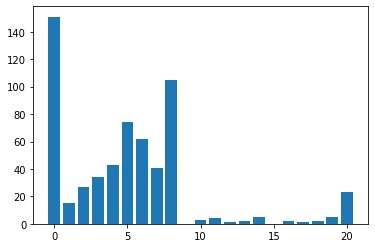

In [19]:
model = LGBMClassifier(n_estimators=20, max_depth=9, boosting_type='goss')
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])
importance = model.feature_importances_

for i,v in enumerate(importance):
    print(X_train.columns[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Scoring Model

In [20]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.7942652437933749


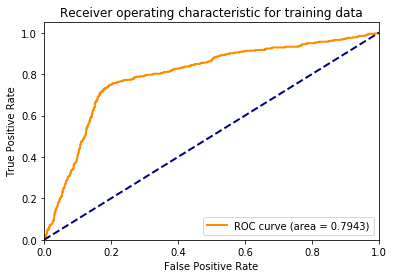

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()